# Les Differents modules utilisés

In [ ]:
import os
import cv2
import imutils
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import cv2
import numpy
from google.colab import drive

# Chargement de la Dataset

In [ ]:
drive.mount('/content/drive')
haarCascade = "/content/drive/MyDrive/haarcascade_frontalface_default.xml"
dataSetPath = "/content/drive/MyDrive/dataset"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Preparation des données

In [ ]:
#Fonction qui detect
# les visage pour une image donnée

def detectFace(img):
    
    face_cascade = cv2.CascadeClassifier(haarCascade)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3,minNeighbors=5,minSize=(64, 64))
    for (x, y, w, h) in faces:
        face = gray[(y):y + h , (x):x + w]
        face = cv2.resize(face,(128,128,),interpolation = cv2.INTER_AREA)
        return face
    return faces

#Fonction qui parcours le dossier Dataset
# retourne une liste d'image numeriser et leurs label
def prepareData(datasetPath):
    n_image = 0
    labels = []
    images = []
    for root, dirs, files in os.walk(datasetPath):
        label = os.path.basename(root)
        for file_ in files:
            full_file_path = os.path.join(root, file_)
            img = cv2.imread(full_file_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            face = detectFace(img)
            if isinstance(face, tuple):
                continue
            else :
              images.append(face)
              labels.append(label)
    return (images,labels)

275
(220, 16384) (55, 16384)


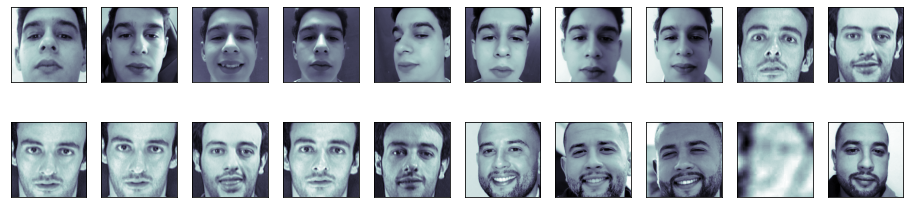

In [ ]:
(X,labels) = prepareData(dataSetPath)
fig = plt.figure(figsize=(16, 6))
for i in range(20):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X[i],cmap=plt.cm.bone)
#Nombre totales des images
n_samples = len(X)
print(n_samples)
#Convertion de la liste en NumpyArray
X = numpy.array(X)
# Compression des images en une seule matrice
face_Matrix = X.reshape((n_samples,128*128))
# Partitionnement de la dataset
X_train, X_test, y_train, y_test = train_test_split(face_Matrix, labels, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape)

# Prétraitement des données

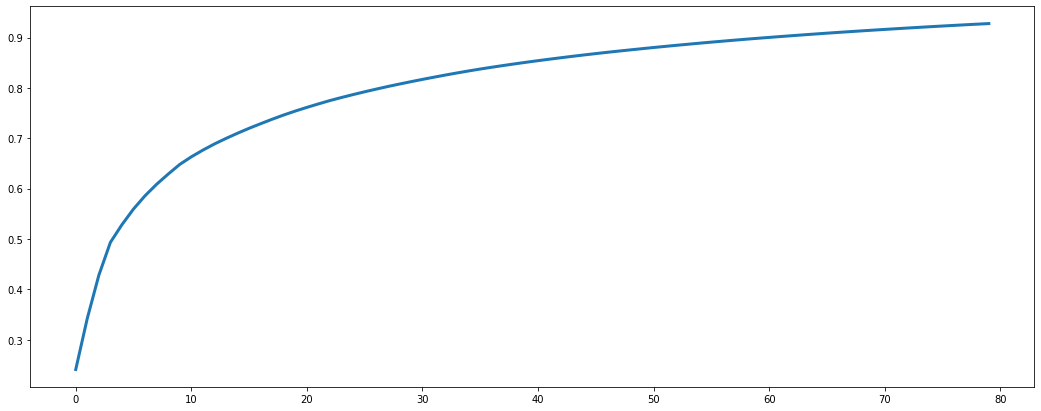

In [ ]:
# Definition de l'hyperParametre K
k = 80
# Instace PCA
pca = PCA(n_components=k)
# Ajuster le modèle
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
# Explication du choix de la valeur de K
plt.figure(figsize=(18, 7))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)

# Visualisation des donnés apres le Traitement

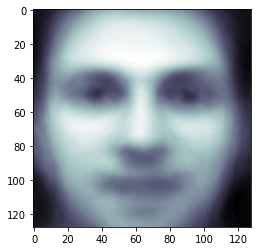

In [ ]:
# Le moyen des Visage (Mean Face)
plt.imshow(pca.mean_.reshape(X[0].shape),
           cmap=plt.cm.bone)

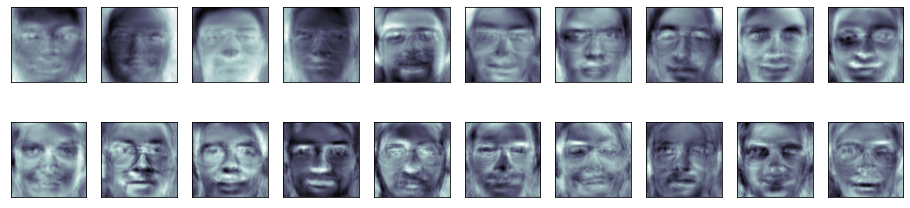

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(20):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(pca.components_[i].reshape(X[0].shape),
              cmap=plt.cm.bone)

# Entrainment du modele de Prediction

In [ ]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

#Evaluation du modéle

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       ahmed       1.00      0.50      0.67         2
        nour       1.00      1.00      1.00         1
          s1       0.00      0.00      0.00         0
         s10       0.50      1.00      0.67         1
         s11       1.00      1.00      1.00         1
         s12       1.00      1.00      1.00         2
         s13       0.67      1.00      0.80         2
         s14       1.00      1.00      1.00         1
         s15       1.00      1.00      1.00         1
         s16       1.00      0.50      0.67         2
         s18       0.50      1.00      0.67         1
         s19       1.00      1.00      1.00         1
         s20       1.00      1.00      1.00         2
         s21       0.67      1.00      0.80         2
         s22       1.00      1.00      1.00         1
         s23       1.00      1.00      1.00         1
         s24       1.00      1.00      1.00         2
         s26       0.50    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


# Enregistrement du Modéle

In [ ]:
import pickle
preprocessData = "/content/pca.sav"
classifier = '/content/classifier.sav'
pickle.dump(pca, open(preprocessData, 'wb'))
pickle.dump(clf, open(classifier, 'wb'))